In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, confusion_matrix, precision_score, roc_auc_score
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
from collections import Counter

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import zipfile
!wget https://github.com/Simplilearn-Edu/Artificial-Intelligence-Capstone-Project-Datasets/blob/master/Project%201-Ecommerce-Datasets.zip


--2023-03-04 21:14:26--  https://github.com/Simplilearn-Edu/Artificial-Intelligence-Capstone-Project-Datasets/blob/master/Project%201-Ecommerce-Datasets.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Project 1-Ecommerce-Datasets.zip’

Project 1-Ecommerce     [ <=>                ] 137.94K  --.-KB/s    in 0.04s   

2023-03-04 21:14:26 (3.67 MB/s) - ‘Project 1-Ecommerce-Datasets.zip’ saved [141252]



In [3]:
df_train = pd.read_csv('/content/drive/Othercomputers/Mein Laptop/Desktop/Ecommerce/train_data.csv')
df_test = pd.read_csv('/content/drive/Othercomputers/Mein Laptop/Desktop/Ecommerce/test_data_hidden.csv')

In [4]:
df_train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [5]:
df_test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [8]:
df_train.describe().transpose()

,count,unique,top,freq
name,4000,23,Amazon Echo Show Alexa-enabled Bluetooth Speak...,676
brand,4000,1,Amazon,4000
categories,4000,23,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",628
primaryCategories,4000,4,Electronics,2600
reviews.date,4000,638,2017-01-23T00:00:00.000Z,99
reviews.text,4000,3598,I bought this kindle for my 11yr old granddaug...,4
reviews.title,3990,2606,Great tablet,100
sentiment,4000,3,Positive,3749


In [9]:
df_test.describe().transpose()

,count,unique,top,freq
name,1000,23,Amazon Echo Show Alexa-enabled Bluetooth Speak...,169
brand,1000,1,Amazon,1000
categories,1000,23,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",169
primaryCategories,1000,4,Electronics,676
reviews.date,1000,366,2017-01-23T00:00:00.000Z,26
reviews.text,1000,979,I bought the white version and have it in the ...,2
reviews.title,997,796,Great tablet,22
sentiment,1000,3,Positive,937


In [10]:
df_train.shape

(4000, 8)

In [11]:
df_test.shape

(1000, 8)

In [12]:
df_train.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [13]:
df_test.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        3
sentiment            0
dtype: int64

In [14]:
df_train['reviews.title'] = df_train['reviews.title'].fillna(" ")
df_test["reviews.title"] = df_test['reviews.title'].fillna(" ")

In [15]:
df_train.isnull().sum().sum()

0

In [16]:
df_test.isnull().sum().sum()

0

In [17]:
df_train.drop(['brand'], axis = 1, inplace = True)
df_test.drop(['brand'], axis = 1, inplace = True)

In [18]:
duplicate_train = df_train[df_train.duplicated() == True]
duplicate_train.sentiment.value_counts()

Positive    55
Negative     3
Name: sentiment, dtype: int64

In [19]:
duplicate_test = df_test[df_test.duplicated() == True]
duplicate_test.sentiment.value_counts()

Positive    3
Name: sentiment, dtype: int64

In [20]:
df_train.drop_duplicates(inplace = True)
print('the Number the sentiments are duplicated in Train Data is :', df_train.duplicated().sum())
df_test.drop_duplicates(inplace = True)
print('the Number the sentiment are duplicated in Test Data is :', df_test.duplicated().sum())

the Number the sentiments are duplicated in Train Data is : 0
the Number the sentiment are duplicated in Test Data is : 0


In [21]:
# Check the positive, negative, and neutral reviews
Positive =  df_train[df_train['sentiment'] == 'Positive']
Positive[['reviews.title','reviews.text']]

,reviews.title,reviews.text
0,Powerful tablet,Purchased on Black FridayPros - Great Price (e...
1,Amazon Echo Plus AWESOME,I purchased two Amazon in Echo Plus and two do...
3,Greattttttt,"very good product. Exactly what I wanted, and ..."
4,Very durable!,This is the 3rd one I've purchased. I've bough...
5,You will love it,This is a great product. Light weight. I wish ...
...,...,...
3995,Fun toy,"It‚Äôs fun for the family to play with, but it..."
3996,Great Product,"I love the Kindle, it is a great product. It r..."
3997,"Great ""dumb"" speaker",I was looking for a blutooth speaker to use wi...
3998,A great 7 inch tablet at a great price,This is the second Amazon Fire 7 tablet I have...


In [22]:
Positive = df_train[df_train['sentiment'] == 'Negative']
Positive[['reviews.title', 'reviews.text']]

,reviews.title,reviews.text
9,"was cheap, can not run chrome stuff, returned","was cheap, can not run chrome stuff, returned ..."
97,Useless screen so why pay for it?,"Worthless, except as a regular echo and a poor..."
104,Amazon Fire 7 Tablet,Too bad Amazon turned this tablet into a big a...
121,Kid's Kindle,I bought this Kindle for my 7 year old grand-d...
150,Have never purchased a more frustrating Device,I am reading positive reviews and wish I could...
...,...,...
3818,Terrible,I bought this because I have ebooks in college...
3864,Just ok,This tablet could be so much better if the app...
3876,Not worth the money,"Waste of money, ask Alexa a question and you a..."
3898,Just get a regular Echo or a good portable Spe...,"The tap is a great concept, I love my echo so ..."


In [23]:
Positive = df_train[df_train['sentiment'] == 'Neutral']
Positive[['reviews.title','reviews.text']]

,reviews.title,reviews.text
2,Average,Just an average Alexa option. Does show a few ...
6,OK For Entry Level Tablet,My 7-year old daughter saved up to by this. He...
17,Not as good as before,"Not as good as before the old kindle, just sea..."
59,"Does what it says, missing one key feature",There is nothing spectacular about this item b...
95,Haven't set it up yet,It's unfair for me to rate this product cause ...
...,...,...
3819,An ok tablet,It's an ok tablet because you need to have an ...
3840,"Decent, does the job","Works fine on wifi, otherwise a little slow. M..."
3904,ok tablet for a small child,The sleek design and colors available for smal...
3949,Ok for the price.,Decent somewhat slow. Netflix freezes up at ti...


<AxesSubplot:xlabel='sentiment', ylabel='count'>

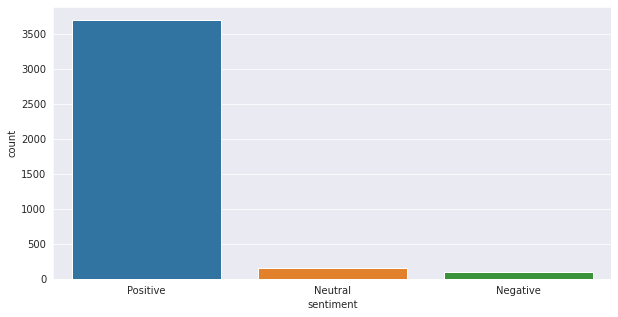

In [24]:
#Check the class count for each class.
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x = 'sentiment', data = df_train)

<AxesSubplot:xlabel='primaryCategories', ylabel='count'>

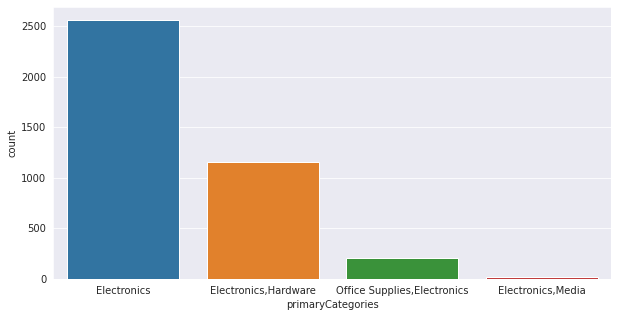

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'primaryCategories', data = df_train)

In [26]:
df_train['sentiment'] = df_train['sentiment'].map({'Positive':2, 'Neutral':1, 'Negative':0})

In [27]:
df_test['sentiment'] = df_test['sentiment'].map({'Positive':2, 'Neutral':1, 'Negative':0})

In [28]:
df_train.shape

(3942, 7)

In [29]:
reviewstext_train = df_train['reviews.text'].tolist()
reviewstext_test = df_test['reviews.text'].tolist()
reviewstitle_train = df_train['reviews.title'].tolist()
reviewstitle_test = df_test['reviews.title'].tolist()

In [30]:
print('len(reviewstext_train) is :',len(reviewstext_train))
print('len(reviewstext_test) is :',len(reviewstext_test))
print('len(reviewstitle_train) is :',len(reviewstitle_train))
print('len(reviewstext_test) is :',len(reviewstitle_test))

len(reviewstext_train) is : 3942
len(reviewstext_test) is : 997
len(reviewstitle_train) is : 3942
len(reviewstext_test) is : 997


In [31]:
def preprocess_text(reviews):
  # Normalize the casing:
  corp = str(reviews).lower() 

  # Text cleaning # # Replace URLs # Remove punctuation # Remove numbers:
  corp = re.sub('[^a-zA-z]+',' ',corp).strip()
  corp = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)',' ',corp).strip()
  corp = re.sub(r'[^\w\d\s]',' ', corp).strip()
  corp = re.sub(r'\d+(\.\d+)?',' ', corp).strip()

  # use the funktion word_tokenize :
  tokens = word_tokenize(corp)

  #remove the stopword:
  words = [t for t in tokens if t not in stop_words]

  lemmatize = [lemma.lemmatize(w) for w in words]
  return lemmatize


In [32]:
import nltk
nltk.download('omw-1.4')

lemma = WordNetLemmatizer()
pre_reviewstext = [preprocess_text(i) for i in reviewstext_train]
pre_reviewstitle = [preprocess_text(i) for i in reviewstitle_train]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [33]:
clean_reviewstext = [' '.join(review) for review in pre_reviewstext]
clean_reviewstitle = [' '.join(review) for review in pre_reviewstitle]

In [34]:
lemma = WordNetLemmatizer()
pre_reviewstext_test = [preprocess_text(i) for i in reviewstext_test]
pre_reviewstitle_test = [preprocess_text(i) for i in reviewstitle_test]

In [35]:
clean_reviewstext_test = [' '.join(review) for review in pre_reviewstext_test]
clean_reviewstitle_test = [' '.join(review) for review in pre_reviewstitle_test]

In [36]:
pd.DataFrame(df_train['name'].value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


In [37]:
pd.DataFrame(df_train['categories'].value_counts())

,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


In [38]:
pd.DataFrame(df_train['primaryCategories'].value_counts())

,primaryCategories
Electronics,2562
"Electronics,Hardware",1159
"Office Supplies,Electronics",204
"Electronics,Media",17


In [39]:
#convert the categorical variables of the train set:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['name'] = le.fit_transform(df_train['name'].values)
df_train['categories'] = le.fit_transform(df_train['categories'].values)
df_train['primaryCategories'] = le.fit_transform(df_train['primaryCategories'].values)

#convert the categorical variables of the test set:
df_test['name'] = le.fit_transform(df_test['name'].values)
df_test['categories'] = le.fit_transform(df_test['categories'].values)
df_test['primaryCategories'] = le.fit_transform(df_test['primaryCategories'].values)

In [40]:
df_train.head()

,name,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,2,10,0,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2
1,5,1,1,2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2
2,9,2,1,2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1
3,14,22,3,2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2
4,13,9,0,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2


In [41]:
df_train['reviews.date'].str.split('T').str[0]

0       2016-12-26
1       2018-01-17
2       2017-12-20
3       2017-08-04
4       2017-01-23
           ...    
3995    2017-12-08
3996    2017-03-31
3997    2017-01-19
3998    2016-05-27
3999    2016-12-30
Name: reviews.date, Length: 3942, dtype: object

In [42]:
df_train['reviews_day'] = pd.to_datetime(df_train['reviews.date'], format ='%Y-%m-%d').dt.day
df_train['reviews_month'] = pd.to_datetime(df_train['reviews.date'], format = '%Y-%m-%d').dt.month
df_train['reviews_year'] = pd.to_datetime(df_train['reviews.date'], format = '%Y-%m-%d').dt.year

In [43]:
df_train.drop(['reviews.date'], axis = 1, inplace = True)

In [44]:
df_test['reviews.date'].str.split('T').str[0]

0      2016-05-23
1      2018-01-02
2      2017-01-02
3      2017-03-25
4      2017-11-15
          ...    
995    2017-12-07
996    2017-01-23
997    2017-01-18
998    2016-12-12
999    2017-06-17
Name: reviews.date, Length: 997, dtype: object

In [45]:
df_test['reviews_day'] = pd.to_datetime(df_test['reviews.date'], format = '%Y-%m-%d').dt.day
df_test['reviews_month'] = pd.to_datetime(df_test['reviews.date'], format = '%Y-%m-%d').dt.month
df_test['reviews_year'] = pd.to_datetime(df_test['reviews.date'], format = '%Y-%m-%d').dt.year

In [46]:
df_test.drop(['reviews.date'], axis= 1, inplace = True)

In [47]:
df_train.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,2,10,0,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2,26,12,2016
1,5,1,1,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2,17,1,2018
2,9,2,1,Just an average Alexa option. Does show a few ...,Average,1,20,12,2017
3,14,22,3,"very good product. Exactly what I wanted, and ...",Greattttttt,2,4,8,2017
4,13,9,0,This is the 3rd one I've purchased. I've bough...,Very durable!,2,23,1,2017


In [48]:
df_test.head()

,name,categories,primaryCategories,reviews.text,reviews.title,sentiment,reviews_day,reviews_month,reviews_year
0,19,11,0,Amazon kindle fire has a lot of free app and c...,very handy device,2,23,5,2016
1,9,6,1,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2,2,1,2018
2,2,10,0,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2,2,1,2017
3,13,9,0,"I use mine for email, Facebook ,games and to g...",Love it!!!,2,25,3,2017
4,9,6,1,This is a fantastic item & the person I bought...,Fantastic!,2,15,11,2017


In [49]:
reviewstext = []
reviewstext = clean_reviewstext + clean_reviewstext_test
reviewstitle = clean_reviewstitle + clean_reviewstitle_test

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVect =TfidfVectorizer() 
reviews = TfidfVect.fit_transform(reviewstext) 
words = TfidfVect.get_feature_names_out()

In [51]:
# Convert the reviews in train set into Tf-Idf score:

vectorizer_text = TfidfVectorizer()
vectorizer_text.fit(reviewstext)
vectorizer_title = TfidfVectorizer()
vectorizer_title.fit(reviewstitle)

vect_reviewstext = pd.DataFrame(vectorizer_text.transform(clean_reviewstext).toarray())
vect_reviewstitle = pd.DataFrame(vectorizer_title.transform(clean_reviewstitle).toarray())

am_df_train = df_train.reset_index()
am_df_train = pd.concat([am_df_train.drop(['reviews.text','reviews.title','index'], axis = 1), vect_reviewstext,vect_reviewstitle],axis = 1)
am_df_train.head()

,name,categories,primaryCategories,sentiment,reviews_day,reviews_month,reviews_year,0,1,2,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0,2,10,0,2,26,12,2016,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,1,1,2,17,1,2018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,2,1,1,20,12,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,22,3,2,4,8,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,9,0,2,23,1,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Convert the reviews in test set into Tf-Idf score
vect_reviewstext_test = pd.DataFrame(vectorizer_text.transform(clean_reviewstext_test).toarray()) 
vect_reviewstitle_test = pd.DataFrame(vectorizer_title.transform(clean_reviewstitle_test).toarray()) 


am_df_test = df_test.reset_index()
am_df_test = pd.concat([am_df_test.drop(['reviews.text','reviews.title','index'],axis=1), vect_reviewstext_test, vect_reviewstitle_test],axis=1)
am_df_test.head()

,name,categories,primaryCategories,sentiment,reviews_day,reviews_month,reviews_year,0,1,2,...,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168
0,19,11,0,2,23,5,2016,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,6,1,2,2,1,2018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,10,0,2,2,1,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,9,0,2,25,3,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,6,1,2,15,11,2017,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#split the data into train and test set:

x_train = am_df_train.drop(['sentiment'],axis =1)
x_test = am_df_test.drop(['sentiment'], axis = 1)
y_train = am_df_train['sentiment']
y_test = am_df_test['sentiment']

In [54]:
print('x_train shape is :', x_train.shape)
print('x_test shape is :', x_test.shape)
print('y_train shape is :', y_train.shape)
print('y_test shape is', y_test.shape)

x_train shape is : (3942, 5736)
x_test shape is : (997, 5736)
y_train shape is : (3942,)
y_test shape is (997,)


In [55]:
y_train.dtypes

dtype('int64')

In [56]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
y_train.columns = x_train.columns.astype(str)
y_test.columns = x_train.columns.astype(str)

In [57]:
x_train.isnull().sum().sum()

0

In [58]:
#Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(x_train, y_train)
NB_predict = clf_NB.predict(x_test)
print('Accuracy : ', "%.2f" % (accuracy_score(y_test, NB_predict)*100))
print('F1 : ', "%.2f" % (f1_score(y_test, NB_predict,average='weighted')*100))
print('classification Report : \n', (classification_report(y_test, NB_predict)))

Accuracy :  93.68
F1 :  90.62
classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



In [59]:
#Oversampling or undersampling can be used to tackle the class imbalance problem:
oversample = SMOTE(sampling_strategy='not majority')
x_over, y_over = oversample.fit_resample(x_train.values, y_train)

In [60]:
#chicke the number of samples before and after oversampling:
print(Counter(y_train))
print(Counter(y_over))

Counter({2: 3694, 1: 158, 0: 90})
Counter({2: 3694, 1: 3694, 0: 3694})


In [61]:
#RandomForestClassifier:
rf_cl = RandomForestClassifier(max_depth = 3, random_state = 42)
rf_cl.fit(x_over, y_over)
rf_cl_pred = rf_cl.predict(x_test)
print('Accuracy :', '%.2f' %(accuracy_score(y_test, rf_cl_pred)*100))
print('F1-Score :', '%.2f' %(f1_score(y_test,rf_cl_pred,average='weighted')*100))
print('classifier_ report : \n', (classification_report(y_test, rf_cl_pred)))

Accuracy : 89.27
F1-Score : 89.83
classifier_ report : 
               precision    recall  f1-score   support

           0       0.26      0.21      0.23        24
           1       0.17      0.26      0.20        39
           2       0.95      0.94      0.94       934

    accuracy                           0.89       997
   macro avg       0.46      0.47      0.46       997
weighted avg       0.90      0.89      0.90       997



In [62]:
#XGBoost Classifier:
from xgboost import XGBClassifier
xgb_cl = XGBClassifier()
xgb_cl.fit(x_over, y_over)
xgb_cl_pred = xgb_cl.predict(x_test.values)
print('Accuracy :', '%.2f' %(accuracy_score(y_test, xgb_cl_pred)*100))
print('F1-Score :', '%.2f' %(f1_score(y_test, xgb_cl_pred, average = 'weighted')*100))
print('classification_report : \n',(classification_report(y_test, xgb_cl_pred)))

Accuracy : 94.68
F1-Score : 93.93
classification_report : 
               precision    recall  f1-score   support

           0       0.80      0.33      0.47        24
           1       0.52      0.33      0.41        39
           2       0.96      0.99      0.97       934

    accuracy                           0.95       997
   macro avg       0.76      0.55      0.62       997
weighted avg       0.94      0.95      0.94       997



In [65]:
#apply multi-class SVM's:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_over, y_over)
rbf_pred = rbf.predict(x_test)
print('Accuracy :', '%.2f' %(accuracy_score(y_test, rbf_pred)*100))
print('F1-Score :', '%.2f' %(f1_score(y_test, rbf_pred, average = 'weighted')*100))
print('Classification_report : \n', (classification_report(y_test, rbf_pred)))

Accuracy : 93.98
F1-Score : 91.51
Classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.67      0.05      0.10        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.87      0.38      0.41       997
weighted avg       0.93      0.94      0.92       997



In [70]:
print('x_over shape is :',x_over.shape)
print('y_over shape is :',y_over.shape)

x_over shape is : (11082, 5736)
y_over shape is : (11082,)


In [72]:
y_over_nn = tf.keras.utils.to_categorical(y_over,3)
y_test_nn = tf.keras.utils.to_categorical(y_test,3)

In [79]:
#neurnal net
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((5736,),input_shape=(5736,)))
#normalize the data:
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
#normalization:
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
#normalization:
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
#normalization:
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_over , y_over_nn,
          validation_data = (x_test, y_test_nn),
          batch_size = 32,
          epochs = 5)

Epoch 1/5
347/347 [==============================] - 10s 7ms/step - loss: 0.1237 - accuracy: 0.9592 - val_loss: 0.2404 - val_accuracy: 0.9388
Epoch 2/5
347/347 [==============================] - 2s 6ms/step - loss: 0.0191 - accuracy: 0.9957 - val_loss: 0.3401 - val_accuracy: 0.9348
Epoch 3/5
347/347 [==============================] - 2s 6ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.3894 - val_accuracy: 0.9408
Epoch 4/5
347/347 [==============================] - 2s 6ms/step - loss: 0.0126 - accuracy: 0.9968 - val_loss: 0.3826 - val_accuracy: 0.9428
Epoch 5/5
347/347 [==============================] - 3s 8ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.4033 - val_accuracy: 0.9358


In [83]:
clf_onb = MultinomialNB()
clf_onb.fit(x_over, y_over)
clf_onb_pred = clf_onb.predict(x_test)
print('Accuracy :','%.2f' %(accuracy_score(y_test, clf_onb_pred)*100))
print('F1-Score :', '%.2f' %(f1_score(y_test, clf_onb_pred, average = 'weighted')*100))
print('classification_report : \n',(classification_report(y_test, clf_onb_pred)))

Accuracy : 88.57
F1-Score : 90.19
classification_report : 
               precision    recall  f1-score   support

           0       0.43      0.42      0.43        24
           1       0.17      0.38      0.24        39
           2       0.97      0.92      0.94       934

    accuracy                           0.89       997
   macro avg       0.53      0.57      0.54       997
weighted avg       0.92      0.89      0.90       997



In [88]:
# ensemble techniques (XGboost + oversampled_multinomial_NB)
model1_NB = MultinomialNB()
model2_XGB =  XGBClassifier(n_estimators=50,max_depth=3)
model_vot = VotingClassifier(estimators=[('lr', model1_NB), ('dt', model2_XGB)], voting='hard')
model_vot.fit(x_over, y_over)
model_vot_pred = model_vot.predict(x_test.values) 
print('Accuracy : ', "%.2f" % (accuracy_score(y_test, model_vot_pred)*100))
print('F1 : ', "%.2f" % (f1_score(y_test, model_vot_pred,average='weighted')*100))
print('classification Report : \n', (classification_report(y_test, model_vot_pred)))


Accuracy :  86.86
F1 :  89.21
classification Report : 
               precision    recall  f1-score   support

           0       0.34      0.46      0.39        24
           1       0.18      0.49      0.27        39
           2       0.97      0.90      0.93       934

    accuracy                           0.87       997
   macro avg       0.50      0.61      0.53       997
weighted avg       0.92      0.87      0.89       997



In [89]:
data_train = {
    'clean_reviewstext' : clean_reviewstext,
    'clean_reviewstitle': clean_reviewstitle
}
df_train = pd.DataFrame(data = data_train)

In [90]:
data_test = {
    'clean_reviewstext_test' : clean_reviewstext_test,
    'clean_reviewstitle_test': clean_reviewstitle_test
}
df_test = pd.DataFrame(data = data_test)

In [91]:
#use TextBlob to assign a score to the sentence sentiment:
x_train['sentiment_score_text'] = df_train['clean_reviewstext'].apply(lambda x:(TextBlob(x).sentiment.polarity))
x_train['sentiment_score_title'] = df_train['clean_reviewstitle'].apply(lambda x:(TextBlob(x).sentiment.polarity))
x_train[['sentiment_score_text','sentiment_score_title']].head()

,sentiment_score_text,sentiment_score_title
0,0.433333,0.30
1,0.441071,1.00
2,-0.110714,-0.15
3,0.550000,0.00
4,0.500000,0.00


In [1]:
x_test['sentiment_score_text'] = df_test['clean_reviewstext_test'].apply(lambda x:(TextBlob(x).sentiment.polarity))
x_test['sentiment_score_title'] = df_test['clean_reviewstitle_test'].apply(lambda x:(TextBlob(x).sentiment.polarity))
x_test[['sentiment_score_text','sentiment_score_title']].head()

NameError: ignored

In [ ]:
# define oversampling strategy:
